# Classify the Opponents
#### Apply K-means algorithm to coefficients from opponents' model to classify the opponents

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Read the coefficients of trained models

In [2]:
df = pd.read_csv('Opponents_Model.csv')
df.head()

,OPPONENT_TEAM_ID,OPPONENT_TEAM_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT
0,1610612737,ATL,-0.038483,0.050863,-0.223960,0.022348,-0.149025,-0.044172,0.412638,-0.023904,0.031030,-0.118089
1,1610612738,BOS,-0.001170,0.033276,-0.175814,0.025069,-0.216515,0.002937,0.488608,-0.067658,0.059306,-0.165304
2,1610612739,CLE,-0.024528,0.030324,-0.120953,-0.018222,-0.240736,0.033132,0.477559,-0.046767,0.014126,-0.056440
3,1610612740,NOP,-0.025920,0.028251,-0.135552,0.018755,-0.226826,0.028048,0.447506,-0.046439,0.050377,-0.117008
4,1610612741,CHI,-0.013492,0.035249,-0.181976,0.002917,-0.205665,-0.019520,0.496886,-0.041289,0.033752,-0.110507


Give more weight to feature "DIST", and less weight to "COMBINED_SHOT_TYPE_Dunk"

In [3]:
df['DIST'] = df['DIST'] * 2.0
df['COMBINED_SHOT_TYPE_Dunk'] = df['COMBINED_SHOT_TYPE_Dunk'] / 3.0
df.head()

,OPPONENT_TEAM_ID,OPPONENT_TEAM_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT
0,1610612737,ATL,-0.038483,0.050863,-0.447920,0.022348,-0.149025,-0.044172,0.137546,-0.023904,0.031030,-0.118089
1,1610612738,BOS,-0.001170,0.033276,-0.351629,0.025069,-0.216515,0.002937,0.162869,-0.067658,0.059306,-0.165304
2,1610612739,CLE,-0.024528,0.030324,-0.241907,-0.018222,-0.240736,0.033132,0.159186,-0.046767,0.014126,-0.056440
3,1610612740,NOP,-0.025920,0.028251,-0.271103,0.018755,-0.226826,0.028048,0.149169,-0.046439,0.050377,-0.117008
4,1610612741,CHI,-0.013492,0.035249,-0.363951,0.002917,-0.205665,-0.019520,0.165629,-0.041289,0.033752,-0.110507


Classify the opponents with K-Means

In [4]:
X = df.drop(['OPPONENT_TEAM_ID', 'OPPONENT_TEAM_NAME', 'INTERCEPT'], axis=1)
clf = KMeans(n_clusters=5)
clf.fit(X)
print(clf.cluster_centers_)

[[-0.01943057  0.02067    -0.31826141 -0.00553324 -0.18634708 -0.01042336
   0.14314821 -0.03533846  0.04792654]
 [-0.01612982  0.0162858  -0.25139902 -0.00409975 -0.22688977  0.01322714
   0.15994186 -0.04669282  0.04030217]
 [-0.02428215  0.03059192 -0.3527893   0.01024701 -0.20507203  0.00858108
   0.15029906 -0.05529413  0.03426686]
 [-0.02767052  0.02245159 -0.40746887  0.01091496 -0.16751484 -0.02082596
   0.13954706 -0.03825006  0.02493889]
 [-0.0236111   0.03514298 -0.10255188  0.00048935 -0.27785501  0.05065758
   0.16337799 -0.01218626  0.03336563]]


In [5]:
opponent_cluster = df.copy()
opponent_cluster['CLUSTER'] = clf.labels_

In [6]:
opponent_cluster.head()

,OPPONENT_TEAM_ID,OPPONENT_TEAM_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT,CLUSTER
0,1610612737,ATL,-0.038483,0.050863,-0.447920,0.022348,-0.149025,-0.044172,0.137546,-0.023904,0.031030,-0.118089,3
1,1610612738,BOS,-0.001170,0.033276,-0.351629,0.025069,-0.216515,0.002937,0.162869,-0.067658,0.059306,-0.165304,2
2,1610612739,CLE,-0.024528,0.030324,-0.241907,-0.018222,-0.240736,0.033132,0.159186,-0.046767,0.014126,-0.056440,1
3,1610612740,NOP,-0.025920,0.028251,-0.271103,0.018755,-0.226826,0.028048,0.149169,-0.046439,0.050377,-0.117008,1
4,1610612741,CHI,-0.013492,0.035249,-0.363951,0.002917,-0.205665,-0.019520,0.165629,-0.041289,0.033752,-0.110507,2


In [7]:
opponent_cluster.to_csv('Opponents_Cluster.csv', index=False)

View the cluster with location features

In [8]:
X_loc = df[['DIST', 'ANGLE']]
clf_loc = KMeans(n_clusters=5)
clf_loc.fit(X_loc)
print(clf_loc.cluster_centers_)

[[-0.35996985  0.01524068]
 [-0.25139902 -0.00409975]
 [-0.32196406 -0.00506278]
 [-0.10255188  0.00048935]
 [-0.41406228  0.00852394]]


In [9]:
opponent_cluster_loc = df.copy()[['OPPONENT_TEAM_ID', 'OPPONENT_TEAM_NAME', 'DIST', 'ANGLE']]
opponent_cluster_loc['CLUSTER'] = clf.labels_
opponent_cluster_loc.head()

,OPPONENT_TEAM_ID,OPPONENT_TEAM_NAME,DIST,ANGLE,CLUSTER
0,1610612737,ATL,-0.447920,0.022348,3
1,1610612738,BOS,-0.351629,0.025069,2
2,1610612739,CLE,-0.241907,-0.018222,1
3,1610612740,NOP,-0.271103,0.018755,1
4,1610612741,CHI,-0.363951,0.002917,2


In [10]:
opponent_cluster_loc.to_csv('Opponents_Cluster_loc.csv', index=False)

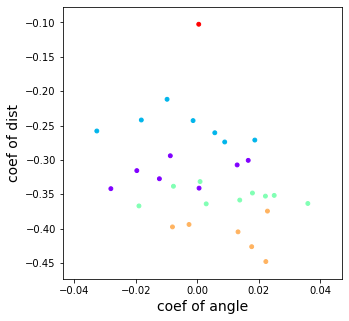

In [11]:
plt.figure(figsize=(5,5))
colors = np.array(opponent_cluster_loc['CLUSTER'])
plt.scatter(opponent_cluster_loc['ANGLE'], opponent_cluster_loc['DIST'], c=colors, s=15, alpha=1.0,
           cmap=plt.get_cmap('rainbow'))
plt.xlabel('coef of angle',fontsize=14)
plt.ylabel('coef of dist', fontsize=14)
plt.show()